# Исследование объявлений о продаже квартир

Дано: архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем на портале Яндекс Недвижимость, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
**Задача: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости**.

Этапы работы по проекту:
1. Изучение датасета.
2. Определение и пояснение пропущенных значений.
3. Корректировка типов данных.
4. Устранение неявных дубликатов влияющих на выборку.
5. Добавление доп.столбцов для анализа.
6. Изучение и визуализация метрики как быстро продовались квартиры.
7. Определение ключевых факторов влияющих на полную стоимость.
8. Определение средней цены квадратного метра для каждого населенного пункта.
9. Определение средней цены для каждого километра в СПБ.
10. Вывод.

# Изучение датасета ##

In [1]:
# импортируем библиотеку, выводим краткую информацию о датасете
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import numpy as np
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
dupls = df.duplicated().sum()
print(f'Количество строк: {df.shape[0]}\n'
        f'Количество столбцов: {df.shape[1]}\n'
         f'Количество строк-дубликатов: {dupls}')

Количество строк: 23699
Количество столбцов: 22
Количество строк-дубликатов: 0


In [2]:
# выводим информацию о столбцах и типах объектов в столбцах датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# выводим первые 10 строк датасета
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# один из столбцов датасета написан CamelCase, приводим все столбцы с snakecase
df.columns = df.columns.str.lower()

In [5]:
# получаем уровень разбоса в исследуемых данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'citycenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

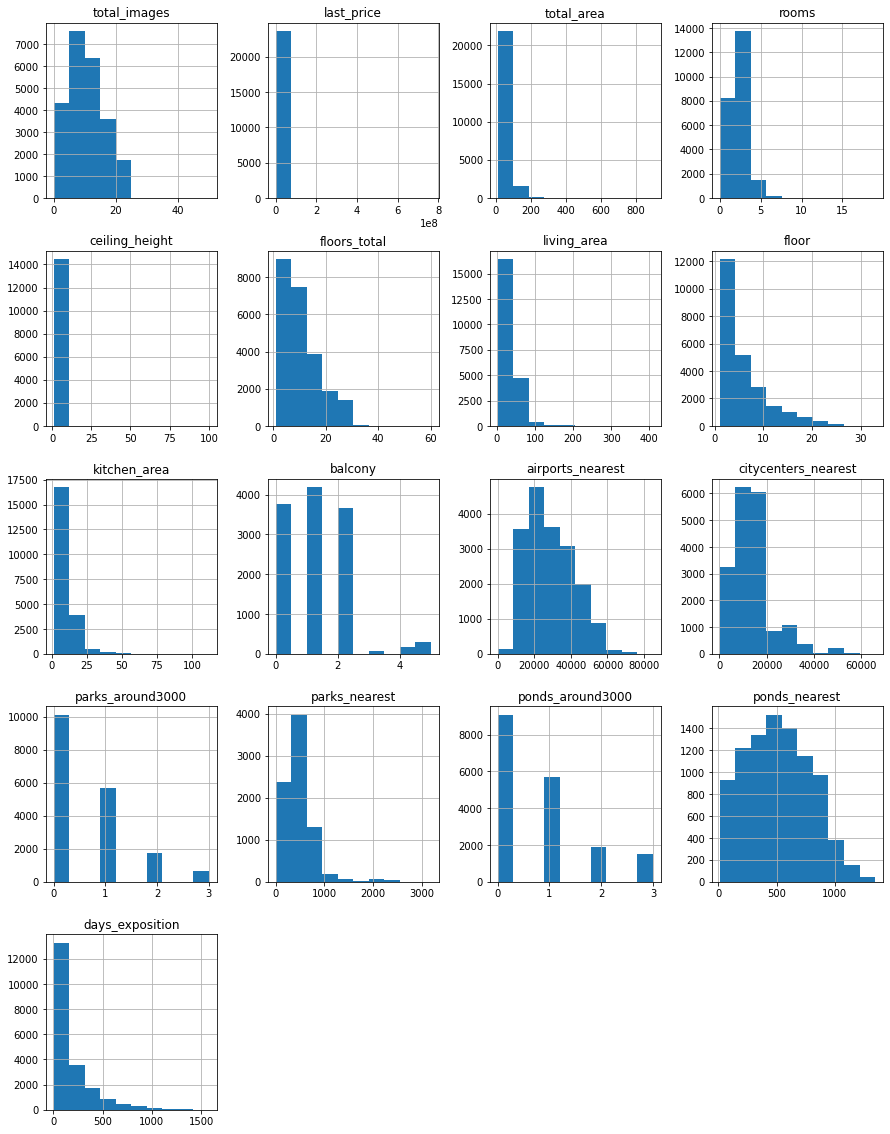

In [6]:
# строим общую гистограмму для всех столбцов
df.hist(figsize=(15, 20))

***База***
В таблице представлены 22 столбца, содержащих информацию о проданных квартирах, их параметрах.
**Задача**: установить параметры для определения рыночной стоимости объектов недвижимости
**Преамбула**: необходимо обратить особое внимание на следующие параметры: 
**living_area** — жилая площадь в квадратных метрах(м²), 
**last_price** — цена на момент снятия с публикации, rooms - число комнат, 
**ceiling_height** - высота потолков (м). 

Нам важны и следующие столбцы: 
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия), 
**citycenters_nearest** — расстояние до центра города (м), 
**locality_name** — название населённого пункта. 
Указанные столбцы необходимы нам для ответа на поставленные вопросы. Постараемся максимально сохранить данные при обработке. 
**Примечание: в датасет не попали ключевые параметры влияющие на стоимость объекта: тип дома, год постройки дома, тип недвижимости(вторичка или новое), тип ремонта**

# Определение пропущенных значений  ##

In [7]:
# подсчитаем доли пропусков по каждому столбцу
df.isna().mean().sort_values()

total_images            0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
studio                  0.000000
total_area              0.000000
last_price              0.000000
first_day_exposition    0.000000
locality_name           0.002068
floors_total            0.003629
living_area             0.080299
kitchen_area            0.096122
days_exposition         0.134225
ponds_around3000        0.232837
parks_around3000        0.232837
citycenters_nearest     0.232879
airports_nearest        0.233850
ceiling_height          0.387991
balcony                 0.486054
ponds_nearest           0.615596
parks_nearest           0.659100
is_apartment            0.882906
dtype: float64

In [8]:
# подсчитаем сколько значений заполнено по столбцу с признаком апартаментов
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Наибольшая доля пропусков приходится на столбец "is_apartament". В данном столбце указывается является ли объект апартаментом. Согласно данным из открытых источников апартаменты имеют существенные отличия по сравнению с квартирами: невозможность прописаться, выше налоги и коммунальные платежи, недоступность льготных ипотечных программ. Считается, что стоимость апартаментов в среднем ниже 10-15% по сравнению с квартирами-аналогами. К сожалению, выборка настолько мала, что проверка данной гипотезы невозможно. Невозможно и заполнение пропусков значениями по умолчанию. Согласно исходным данным датасет содержит в себе данные о продажах за несколько лет. Но количество объектов-апартаментов в нём составляет всего 50 шт. или 1,8% от всех объектов с заполненными ячейками. Согласно данным из открытых источников доля продаж апартаментов составляет в среднем 15 % от общей объема предложений по жилой недвижимости.
**Вывод: гипотеза о влиянии данного параметра на стоимость не может быть проверена из-за 88% пропусков. При этом, данные пропуски не могут быть заполнены значениями по умолчанию, а данные по заполненным ячейкам не могут быть мастшабированы на весь датасет так как это исказит данные. Данный столбец не учитываем в анализе, пропуски не заполняем.**

In [9]:
# подсчитаем кол-во пропусков в картографических столбцах
geocolumns = ['airports_nearest', 'parks_nearest' , 'ponds_nearest', 'citycenters_nearest', 'ponds_around3000' , 'parks_around3000']
for i in geocolumns:
    nodata = df[i].isna().sum()
    print(f'Количество пропусков в столбце {i} составляет {nodata}')

Количество пропусков в столбце airports_nearest составляет 5542
Количество пропусков в столбце parks_nearest составляет 15620
Количество пропусков в столбце ponds_nearest составляет 14589
Количество пропусков в столбце citycenters_nearest составляет 5519
Количество пропусков в столбце ponds_around3000 составляет 5518
Количество пропусков в столбце parks_around3000 составляет 5518


Изучим количество пропусков в столбцах с картографическими типами данных. Столбцы *parks_around3000* и *ponds_around3000* имеют одинаковое количество пропусков. Гипотеза о том, что пропуски = отсутствию объектов в радиусе 3км являетя несостоятельной, так как парки явление более частое, нежели водоёмы. **Поэтому можно сделать вывод, что данная ошибка техническая**. Всёго на 1 пропуск больше в столбце *citycenters_nearest*, что позволяет отнести данные столбец к предыудщим двум в части технической природы ошибки. 
**Гипотеза: все ошибки в картографических столбцах связаны с ошибками в работе алгоритма определяющего расстояния от объекта на продаже, то ключевых локаций поблизости. При этом, в столбцах с большим количеством пропусков (*parks_nearest* и *ponds_nearest*) помимо технических ошибок, пропуски еще могут быть связаны с отсуствием необходимых объектов в ближайшей доступности, например, если алгоритм поиска данных объектов ограничен конкретным радиусом(расстоянием от объекта продажи). 
Предположительная природа технических ошибок - некорректный адрес, либо не полный адрес, который не находит алгоритм, поэтому не может определить ключевые картографические параметры и заполнить данной информацией необходимые столбцы. Данные столбцы оставляем без изменения, пропуски не заполняем, так как их очень много и массовое дефолтное заполнение может исказить данные**

In [10]:
# посмотрим все значения по столбцу с наличием балкона
print(df['balcony'].value_counts(dropna=False))

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


**Почти в половине ячеек по наличию балкона отсутствуют данные. Предположим, что в данном случае отсутствие данных = отсуствие балкона, поскольку наличие балкона важная характеристика квартиры, которая обычно указывается в первом приоритете. В дальнейшем заменим пропуски на 0**

In [11]:
# посмотрим кол-во пропусков, среднее и медианное значение для высоты потолков
print(f'Количество пустых ячеек "ceiling_height" без необходимой информации: {df["ceiling_height"].isna().sum()}')
print(f'Среднее значение высоты потолков: {df["ceiling_height"].mean()}')
print(f'Медианное значение высоты потолков: {df["ceiling_height"].median()}')

Количество пустых ячеек "ceiling_height" без необходимой информации: 9195
Среднее значение высоты потолков: 2.77149889685604
Медианное значение высоты потолков: 2.65


**Параметр высота потолков является одной из ключевых метрик влиющих на стоимость объекта недвижимости**. 
Чем выше потолки, тем дороже объект, элитнее дом и т.д. 
Низкие потолки это признак бюджетного жилья. 
В РФ **наиболее распространены хрущевки, с высотой 2.5 метров**. 
**Гипотеза:** чем выше потолки, тем больше средняя площадь.
Проверим её далее.
Не считаю рациональным заполнять пустые ячейки медианным или средним значением, так как это может исказить результат и зависимость высоты и цены. Вместо этого на 0 и отфильтруем при дальнейшем анализе. 

In [12]:
print(f'Количество пустых ячеек без необходимой информации: {df["days_exposition"].isna().sum()}')

Количество пустых ячеек без необходимой информации: 3181


**Столбец *days_exposition* является ключевым для определения зависимости, так как показывает срок с момента размещения объекта до его продажи** Столбец содержит 3181 пропусков, данные пропуски могут быть связаны как с технической ошибкой(например, некорректный формат дат, который не позволил рассчитать количество дней), так и некорректными размещениями, когда обьявление закрывается сразу после размещения. 
**Заменим пропущенные значения на 0 и не будем учитывать их при дальнейшем анализи зависимостей.**

In [13]:
print(f'Количество пустых ячеек "kitchen_area" без необходимой информации: {df["kitchen_area"].isna().sum()}')
print(f'Количество пустых ячеек "living_area" без необходимой информации: {df["living_area"].isna().sum()}')

Количество пустых ячеек "kitchen_area" без необходимой информации: 2278
Количество пустых ячеек "living_area" без необходимой информации: 1903


**Пустые ячейки в столбцах "площадь кухни" и "жилая площадь" относится к человеческому фактору**. В отличии от общей площади, которая является обязательным параметром обьявления, площадь кухни и жилая площадь это параметры дополнительные. Многие собственники не знают данные параметры, по причине отсуствия технических документов или неузаконенной перепланировки. В результати данные параметры они не указывают.
**Заменем пропущенные значения 0 и не будем учитывать их при дальнейшем анализе зависимостей.**

In [14]:
print(f'Количество пустых ячеек "locality_name" без необходимой информации: {df["locality_name"].isna().sum()}')

Количество пустых ячеек "locality_name" без необходимой информации: 49


Количество пустых ячеек в данном столбце составляет менее 0,22% от общего количества строк. Количество пропусков незначительно. Заменим пропуски на "Информация отсутствует".

In [15]:
print(f'Количество пустых ячеек "floors_total" без необходимой информации: {df["floors_total"].isna().sum()}')

Количество пустых ячеек "floors_total" без необходимой информации: 86


По аналогии с предыдущим столбцом, доля незначительна. Заменим пропуски на 0.

In [16]:
print(f'Количество пустых ячеек "days_exposition" без необходимой информации: {df["days_exposition"].isna().sum()}')

Количество пустых ячеек "days_exposition" без необходимой информации: 3181


In [17]:
df["days_exposition"].value_counts().head(15)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
8.0     139
20.0    139
44.0    138
11.0    135
18.0    129
Name: days_exposition, dtype: int64

In [18]:
# заполнение пропусков значениями
values = {'locality_name': 'Информация отсутствует'}
df.fillna(value=values, inplace=True)

In [19]:
print(len(df))

23699


In [20]:
df = df.dropna(subset=['days_exposition']) 
print(len(df))

20518


Удалил из выборки строки с пропущенными значениями.

Заменим пропуски теми значениями, которые были определены выше

# Корректировка типов данных ##

In [21]:
# изменим типы данных некоторых столбцов, чтобы с ними было легче работать
pd.options.mode.chained_assignment = None
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
columns_to_int = ['total_images', 'last_price', 'rooms',  'floor', 
                  'days_exposition']
for column in columns_to_int:
    df[column] = df[df[column].notna()][column].astype('int32')
    
columns_to_float = ['total_area', 'ceiling_height', 'living_area', 'ponds_around3000',
                  'kitchen_area', 'airports_nearest', 'citycenters_nearest', 'parks_around3000',
                    'parks_nearest', 'parks_around3000', 'ponds_nearest', 'floors_total','balcony']
for column in columns_to_float:
    df[column] = df[df[column].notna()][column].astype('float32')    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int32         
 1   last_price            20518 non-null  int32         
 2   total_area            20518 non-null  float32       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int32         
 5   ceiling_height        12051 non-null  float32       
 6   floors_total          20441 non-null  float32       
 7   living_area           18813 non-null  float32       
 8   floor                 20518 non-null  int32         
 9   is_apartment          2500 non-null   object        
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          18443 non-null  float32       
 13  balcony         

Поменяем формат столбца *first_day_exposition'* с object на datetime64 и проверим корректировки.
Для удобства поменяем тип данных в некоторых столбцах с float на int.

In [22]:
# вывод распределения по городу-продажи
df['locality_name'].value_counts().head(35)

Санкт-Петербург              13638
посёлок Мурино                 517
посёлок Шушары                 408
Всеволожск                     339
Колпино                        308
Пушкин                         307
посёлок Парголово              302
деревня Кудрово                299
Гатчина                        268
Выборг                         208
Петергоф                       176
Сестрорецк                     163
Красное Село                   158
Кудрово                        142
деревня Новое Девяткино        127
Сертолово                      121
Ломоносов                      114
Кингисепп                       95
Тосно                           94
Кириши                          93
Сланцы                          91
Кронштадт                       87
Волхов                          85
Никольское                      77
Сосновый Бор                    74
Коммунар                        74
Кировск                         71
посёлок Металлострой            61
Отрадное            

# Устранение неявных дубликатов ##

In [23]:
# обработка неявных дубликатов
def replace_loc(str):
    str = str.replace('поселок', 'посёлок')
    return str
def correct_towns(str):
    if str == 'Кудрово':
        return 'деревня Кудрово'
    else:
        return str
 
df['locality_name'] = df['locality_name'].apply(replace_loc)
df['locality_name'] = df['locality_name'].apply(correct_towns)
count1 = len(df['locality_name'].unique())
print(f'Количество уникальных значений в столбце до обработки {count1}')   
df['locality_name'].value_counts().head(25)


Количество уникальных значений в столбце до обработки 299


Санкт-Петербург            13638
посёлок Мурино               551
деревня Кудрово              441
посёлок Шушары               408
Всеволожск                   339
Колпино                      308
Пушкин                       307
посёлок Парголово            302
Гатчина                      268
Выборг                       208
Петергоф                     176
Сестрорецк                   163
Красное Село                 158
деревня Новое Девяткино      127
Сертолово                    121
Ломоносов                    114
посёлок Бугры                100
Кингисепп                     95
Тосно                         94
Кириши                        93
Сланцы                        91
Кронштадт                     87
Волхов                        85
Никольское                    77
Коммунар                      74
Name: locality_name, dtype: int64

**В столбце с названием города выявленые неявные дубликаты:**
1. "е" вместо "ё" в слово посёлок
2. Кудрово и деревня Кудрово - один и тот же нас.пункт названный по разному.
Так же были выявлены неявные дубликаты в части наименования населенных пунктов, но поскольку количество таких дубликатов(как и предложений по данному населенному пункту) минимально - оставим их в первоначальном виде.

# Добавление новых столбцов ##

In [24]:
df['one_metr_price'] = round(df['last_price']/df['total_area'], 1)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.8
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.7
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.1
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.8
6,6,3700000,37.299999,2017-11-02,1,NaN,26.0,10.600000,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195.7
8,20,2900000,33.160000,2018-05-23,1,NaN,27.0,15.430000,26,NaN,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454.8
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524.6
10,5,5050000,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,NaN,...,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,127525.3
11,9,3300000,44.000000,2018-08-27,2,NaN,5.0,31.000000,4,False,...,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7,75000.0


Добавим столбец со стоимостью 1 кв.метра для каждого объекта

In [25]:
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['day'] = df['first_day_exposition'].dt.weekday

dict_of_weekdays = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 
                    4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
df['day'] = df['day'].map(dict_of_weekdays)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81,82920.8,12,2018,Вторник
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558,92785.7,8,2015,Четверг
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424,408176.1,7,2015,Пятница
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121,100000.0,6,2018,Вторник
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55,95065.8,9,2018,Понедельник


Добавим столбцы с сегментацией по году, дате, месяце и дню публикации обьявления

In [26]:
df['floor_cat'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_cat'] = np.where(df['floor'] == df['floors_total'], 
                                     'последний', df['floor_cat'])

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,0.0,NaN,0.0,NaN,81,82920.8,12,2018,Вторник,первый
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,1.0,90.0,2.0,574.0,558,92785.7,8,2015,Четверг,другой
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.1,7,2015,Пятница,другой
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.0,6,2018,Вторник,другой
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,NaN,NaN,NaN,NaN,55,95065.8,9,2018,Понедельник,другой


Добавим столбец с категориями по этажу, на котормо находится объект.

In [27]:
df['citycenters_nearest_km'] = df['citycenters_nearest'] / 1000
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat,citycenters_nearest_km
1,7,3350000,40.400002,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,NaN,0.0,NaN,81,82920.8,12,2018,Вторник,первый,18.603001
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,90.0,2.0,574.0,558,92785.7,8,2015,Четверг,другой,13.933000
3,0,64900000,159.000000,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424,408176.1,7,2015,Пятница,другой,6.800000
4,2,10000000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,112.0,1.0,48.0,121,100000.0,6,2018,Вторник,другой,8.098000
5,10,2890000,30.400000,2018-09-10,1,NaN,12.0,14.400000,5,NaN,...,NaN,NaN,NaN,55,95065.8,9,2018,Понедельник,другой,NaN


Добавим столбец с данными по удаленности от центра в КМ

# Изучение выборки ##

Максимальное значение 763000000
Минимальное значение 12190


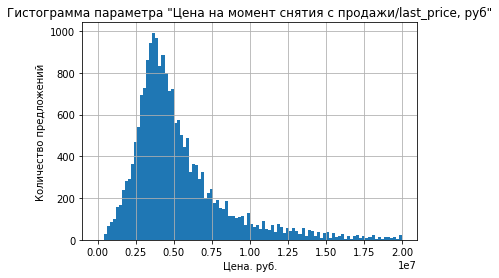

In [28]:
df.hist('last_price', bins=100, range=(0, 20000000))
plt.title('Гистограмма параметра "Цена на момент снятия с продажи/last_price, руб"')
plt.xlabel('Цена. руб.')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['last_price'].max())
print('Минимальное значение', df['last_price'].min())

Распределение в столбце последней цены похоже на колокол, что свидетельствует о адекватности данных. При этом в выборке есть аномально низкие значения, например, минимальная цена - 12 тысяч. это маловероятно для любой квартиры. Возможно в обьявлении забыли указать несколько цифр. Так же в выборке есть присутствует аномально высокие значения в размере 763 000 000 руб. Скорее всего речь идёт о элитной недвижимости, которая реально может столько стоить, но данные значения могут исказить дальнейшие результаты. 
Установим фильтр по цене продаже: от 500 000 руб. до 10 000 000 руб. для увеличения релевантности результатов.


In [29]:
df = df.loc[(df['last_price'] > 500000) & (df['last_price'] < 10000000)]
print(df.shape)

(18413, 28)


Максимальное значение 201.5
Минимальное значение 12.0


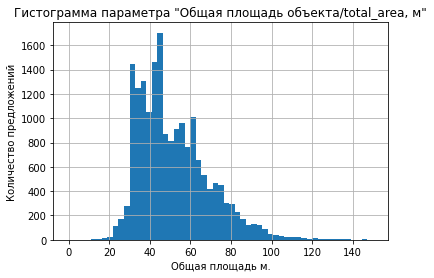

In [30]:
df.hist('total_area', bins=55, range=(0, 150))
plt.title('Гистограмма параметра "Общая площадь объекта/total_area, м"')
plt.xlabel('Общая площадь м.')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['total_area'].max())
print('Минимальное значение', df['total_area'].min())

Распределение в столбце общей похоже на колокол, что свидетельствует о адекватности данных. При этом в выборке есть аномально низкие значения, например, минимальная цена - 12 кв.м . Так же в выборке есть присутствует аномально высокие значения в размере 201 кв.м . Поскольку таких аномальных объектов мало их нельзя учитывать, так как они могут исказить итоговый результат.
Установим фильтр по общей площади: от 20 до 120 кв.м. 

In [31]:
df = df.loc[(df['total_area'] > 20) & (df['total_area'] < 120)]
print(df.shape)

(18316, 28)


Максимальное значение 6
Минимальное значение 0


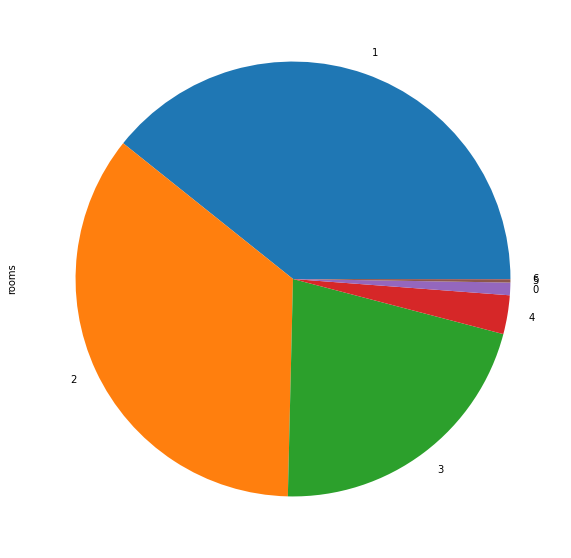

In [32]:
df['rooms'].value_counts().plot(kind='pie', figsize=(10,10))
print('Максимальное значение', df['rooms'].max())
print('Минимальное значение', df['rooms'].min())

In [33]:
rooms0 = df.query('studio == True')
rooms0['rooms'].value_counts()


0    115
1     11
Name: rooms, dtype: int64

В столбце с количеством комнат аномалий не выявлено. 0 по комнатам соотвествуют квартирам-студиям. 6комнатные квартиры тоже реальны. Нет смысла что-то исключать из выборки.

Максимальное значение 64.0
Минимальное значение 2.0


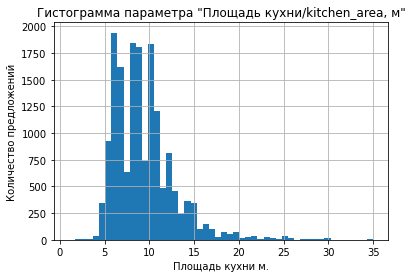

In [34]:
df.hist('kitchen_area', bins=50, range=(1, 35))
plt.title('Гистограмма параметра "Площадь кухни/kitchen_area, м"')
plt.xlabel('Площадь кухни м.')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['kitchen_area'].max())
print('Минимальное значение', df['kitchen_area'].min())

В столбце с площадью кухни аномалий не выявлено. Распределение нормальное.

Максимальное значение 27.5
Минимальное значение 1.0


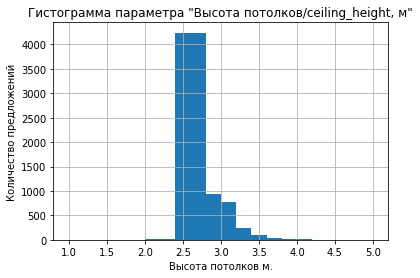

In [35]:
df.hist('ceiling_height', bins=20, range=(1, 5))
plt.title('Гистограмма параметра "Высота потолков/ceiling_height, м"')
plt.xlabel('Высота потолков м.')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['ceiling_height'].max())
print('Минимальное значение', df['ceiling_height'].min())

В столбце с высотой потолков распределение нормальное. Повышение на уровне 3м. связано с особенностями и стандартами строительства. Данную метрику отдельно проанализируем ниже.

Максимальное значение 33
Минимальное значение 1


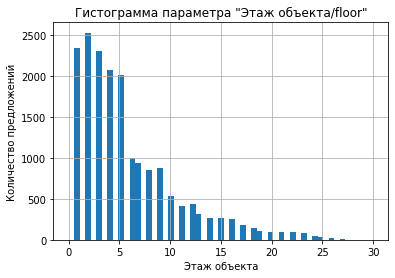

In [36]:
df.hist('floor', bins=55, range=(0, 30))
plt.title('Гистограмма параметра "Этаж объекта/floor"')
plt.xlabel('Этаж объекта')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['floor'].max())
print('Минимальное значение', df['floor'].min())

В столбце с этажом объекта аномалий не выявлено. от 1 до 33 при максимальной высоте для СПБ в 37 этажей.

Максимальное значение 60.0
Минимальное значение 1.0


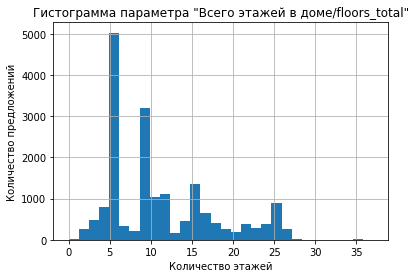

In [37]:
df.hist('floors_total', bins=30, range=(0, 37))
plt.title('Гистограмма параметра "Всего этажей в доме/floors_total"')
plt.xlabel('Количество этажей')
plt.ylabel('Количество предложений')
print('Максимальное значение', df['floors_total'].max())
print('Минимальное значение', df['floors_total'].min())

In [38]:
df['floors_total'].value_counts(ascending=False)

5.0     4534
9.0     3203
12.0    1117
16.0    1063
10.0     904
25.0     891
4.0      804
17.0     658
6.0      492
3.0      481
14.0     459
18.0     413
24.0     385
7.0      328
23.0     297
15.0     288
19.0     274
2.0      272
22.0     238
8.0      205
20.0     198
13.0     161
27.0     143
21.0     139
11.0     132
26.0     111
1.0       19
35.0      18
28.0      16
36.0       2
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [39]:
rooms0 = df.query('floors_total == 0')
rooms0.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat,citycenters_nearest_km


В выборке по столбцу общее количество комнат присутствуют аномалии. Уберем из выборки этажи выше 37. Нулевые этажи оставим, так как их количество существенно, а судя  по срезу 0 связаны с некорректным вводом, так как этаж объекта указан больше 0.

In [40]:
df = df.loc[(df['floors_total'] < 38)]
print(df.shape)

(18249, 28)


<AxesSubplot:ylabel='floor_cat'>

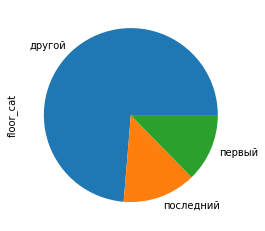

In [41]:
df['floor_cat'].value_counts().plot(kind='pie')

Согласно круговой диаграмме около 27% от общего числа объявлений составляют объявления по продаже объектов на первом или последнем этаже.

<div class="alert alert-info"> <b>Комментарий студента:</b> ГРАФИКИ ПО ВОПРОСУ ВЫШЕ</div>

Максимальное значение 65968.0
Минимальное значение 208.0


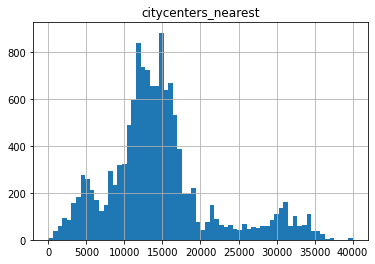

In [42]:
df.hist('citycenters_nearest', bins=66, range=(0, 40000))
print('Максимальное значение', df['citycenters_nearest'].max())
print('Минимальное значение', df['citycenters_nearest'].min())

array([[<AxesSubplot:title={'center':'citycenters_nearest'}>]],
      dtype=object)

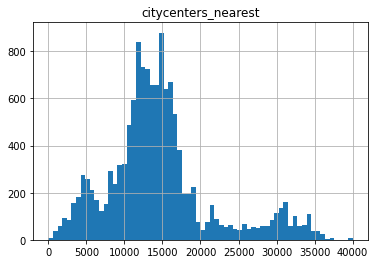

In [43]:
df.hist('citycenters_nearest', bins=66, range=(1, 40000))

В столбце по отдаленности от центра города распределение является нормальным. Можно увидеть пробелы в районе 40 000 метров и выбросы в районе 50 000 метров. 0 отображает ячейки с пропусками. 
Дополнительную фильтрацию применять не будем. А для последующей задачи с сегментацией по км. сделаем дополнительный срез.

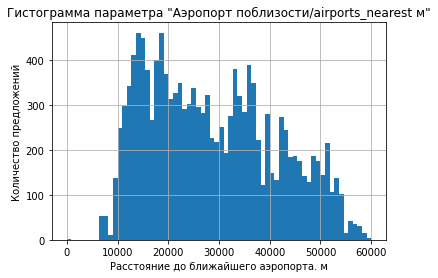

Максимальное значение 84869.0
Минимальное значение 0.0


In [44]:
df.hist('airports_nearest', bins=66, range=(0, 60000))
plt.title('Гистограмма параметра "Аэропорт поблизости/airports_nearest м"')
plt.xlabel('Расстояние до ближайшего аэропорта. м')
plt.ylabel('Количество предложений')
plt.show()
print('Максимальное значение', df['airports_nearest'].max())
print('Минимальное значение', df['airports_nearest'].min())

В столбце по отдаленности от аэропорта распределение является нормальным, при этом существуют волнообразные выбросы, которые могут свидетельствовать о большом количество объявлений в определенных населенных пунктах, что приводит к повышению на небольших отрезках при общей тенденции снижения начиная с 20 000 метров.

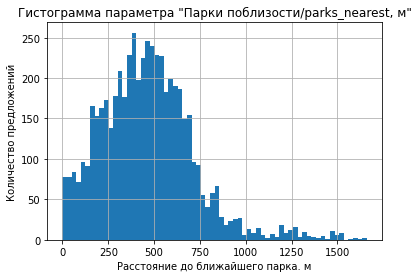

Максимальное значение 3190.0
Минимальное значение 1.0


In [45]:
df.hist('parks_nearest', bins=66, range=(0, 1660))
plt.title('Гистограмма параметра "Парки поблизости/parks_nearest, м"')
plt.xlabel('Расстояние до ближайшего парка. м')
plt.ylabel('Количество предложений')
plt.show()
print('Максимальное значение', df['parks_nearest'].max())
print('Минимальное значение', df['parks_nearest'].min())

В столбце по близости к парку распределение является нормальным.

In [46]:
no_parks = df.query('parks_nearest > 2000')
no_parks['locality_name'].value_counts()

Санкт-Петербург    56
Колпино             1
Name: locality_name, dtype: int64

In [47]:
no_parks.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat,citycenters_nearest_km
323,6,9591727,72.000000,2017-06-29,2,2.8,10.0,34.000000,9,NaN,...,2295.0,1.0,534.0,118,133218.4,6,2017,Четверг,другой,5.384
438,6,7410000,70.000000,2017-06-29,2,NaN,12.0,NaN,5,NaN,...,2295.0,1.0,534.0,229,105857.1,6,2017,Четверг,другой,5.384
512,8,6260000,43.299999,2014-12-09,1,NaN,8.0,NaN,5,NaN,...,2102.0,3.0,303.0,1155,144572.8,12,2014,Вторник,другой,10.720
680,14,7200000,43.000000,2017-10-31,1,NaN,8.0,9.000000,2,NaN,...,2137.0,1.0,933.0,296,167441.9,10,2017,Вторник,другой,5.232
684,5,9200000,82.930000,2014-12-09,2,NaN,12.0,41.919998,6,NaN,...,2102.0,3.0,303.0,1141,110936.9,12,2014,Вторник,другой,10.720
901,11,6985230,42.099998,2017-12-04,1,NaN,8.0,15.000000,7,NaN,...,2245.0,1.0,1018.0,199,165920.0,12,2017,Понедельник,другой,5.332
1590,3,7500000,70.000000,2017-07-11,2,NaN,18.0,37.000000,13,NaN,...,3064.0,1.0,264.0,4,107142.9,7,2017,Вторник,другой,9.791
1860,19,3500000,45.000000,2016-12-05,2,NaN,5.0,29.100000,3,NaN,...,2888.0,1.0,409.0,473,77777.8,12,2016,Понедельник,другой,9.983
2488,9,4250000,44.000000,2016-06-23,2,NaN,5.0,28.000000,5,NaN,...,2348.0,1.0,412.0,104,96590.9,6,2016,Четверг,последний,10.319
2550,2,6379000,45.259998,2018-06-23,1,NaN,10.0,20.129999,8,NaN,...,2209.0,3.0,252.0,24,140941.2,6,2018,Суббота,другой,10.560


**Интересный факт:** В СПБ есть районы, где в радиусе 2 км. нет ни одного парка. Судя по расстоянию от центра города таких районов даже несколько.

<AxesSubplot:ylabel='day'>

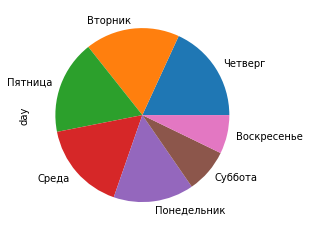

In [48]:
df['day'].value_counts().plot(kind='pie')

Из данной диаграммы сделаем вывод, что люди менее активны в выходные в части выкладывания обьявлений.

<AxesSubplot:ylabel='month'>

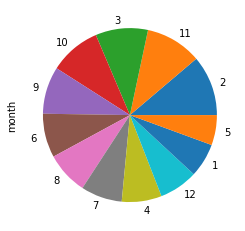

In [49]:
df['month'].value_counts().plot(kind='pie')

# Изучение метрики по сроку продажи объекта

Из данной диаграммы сделаем вывод, что наибольшая доля активностей с недвижимостью приходится на февраль, март, апрель, октябрь и ноябрь  

In [50]:
print('Максимальное значение', df['days_exposition'].max())
print('Минимальное значение', df['days_exposition'].min())

Максимальное значение 1580
Минимальное значение 1


На гистограмме виодно большое количество нулевых значений. Предположим, что это некорректные обьявления, которые выкладывались и удалялись в этот же день. Всё-таки сделки с недвижимостью предполагают несколько этапов обсуждений, просмотров, проверки документов, а тут это самая большая доля. Исключим из выборки обьявление с 0 в days_exposition

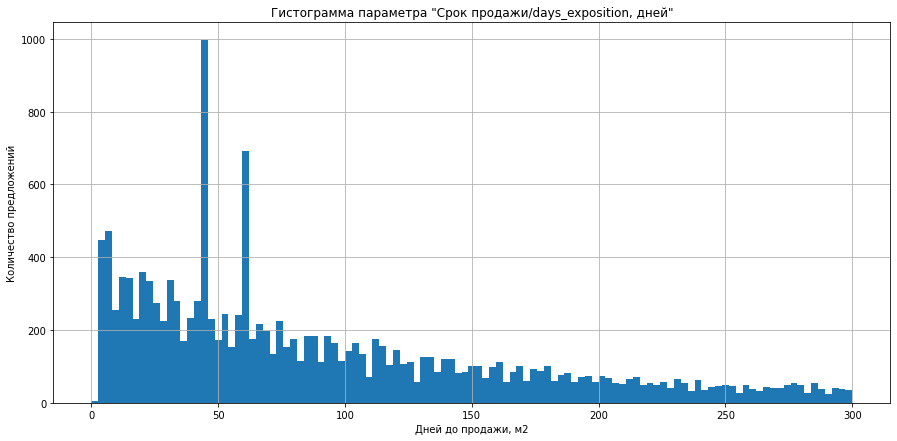

In [51]:
df.hist('days_exposition', bins=111, range=(0, 300), figsize=(15,7))
plt.title('Гистограмма параметра "Срок продажи/days_exposition, дней"')
plt.xlabel('Дней до продажи, м2')
plt.ylabel('Количество предложений')
plt.show()

In [52]:
df['days_exposition'].value_counts(dropna=False).head(15)

45    868
60    530
7     219
30    193
4     159
3     147
5     141
14    136
20    132
8     130
9     130
44    128
11    126
10    124
6     123
Name: days_exposition, dtype: int64

Аномальные значения показывают доли 30, 45 и 60 дней. Данные выбросы связаны с правилами размещения обьявлений. 30 дней срок размещения платного обьявления. Вероятно у Санкт-Петербурга и области раньше действовали иные правила размещения. Возможно те же, что сейчас действуют в регионах. Сейчас там применяется следующая градация: до 4,5 млн — 45 дней, от 4,5 до 10 млн — 60 дней, от 10 млн — 90 дней

In [53]:
print('Среднее значение', df['days_exposition'].mean())
print('Медианное значение', df['days_exposition'].median())

Среднее значение 170.5078634445723
Медианное значение 90.0


Среднее и медианное значения подтверждают гипотезу о неравномерном распределении из-за обьявлений, у которых истекал срок размещения.
**Вывод: наиболее благоприятным периодом для продажи можно считать первые 10 дней с момента размещения обьявления. Как правило в этот период уходят объекты с заниженной стоимостью. Чуть менее благоприятным, но тоже "урожайным" можно признать первые 30 дней с момента размещения. Далее идёт снижение по принипу "чем старше обьявление, тем меньше вероятность продажи". Вероятно в этом сегментме превалируют объекты с завышенной стоимостью.

# Поиск факторов влияющих на стоимость

<AxesSubplot:xlabel='living_area'>

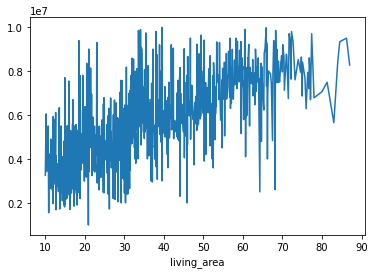

In [54]:
living_area_f = df.query('living_area > 10 and living_area < 100') 
living_area_f = living_area_f.groupby('living_area')['last_price'].agg('mean')
living_area_f.plot()

**Вывод** зависимость цены от жилой площади есть, но она не такая явная, как зависимость от общей площади. Нижняя синяя линия - это 0, там где жилая площадь была не указана.

<AxesSubplot:xlabel='kitchen_area'>

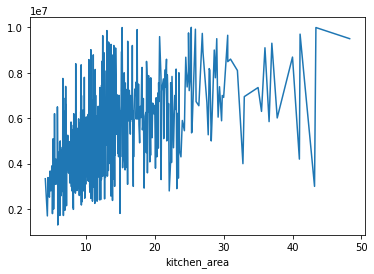

In [55]:
kitchen_area_f = df.query('kitchen_area > 4 and kitchen_area < 50') 
kitchen_area_f = kitchen_area_f.groupby('kitchen_area')['last_price'].agg('mean')
kitchen_area_f.plot()

**Вывод** зависимость цены от площади кухни еще меньше, чем от жилой. Это легко обьясняется, что комнат может быть от 1 до 6, а вот кухня, как правило, всегда одна.

<AxesSubplot:xlabel='floor_cat'>

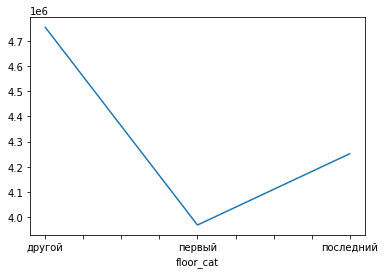

In [56]:
fc = df.groupby('floor_cat')['last_price'].agg('mean')
fc.plot()

**Вывод** Квартиры на первом и последнем этажах, как правило, дешевле, чем квартиры между этими этажами. В случае с первыми этажами зависимость еще больше - там редко встретишь элитные квартиры с высокой стоимостью.

<AxesSubplot:xlabel='day'>

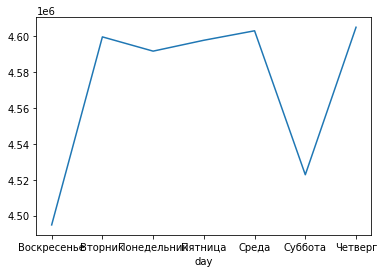

In [57]:
days = df.groupby('day')['last_price'].agg('mean')
days.columns = ['mean']
days.plot()

<AxesSubplot:xlabel='month'>

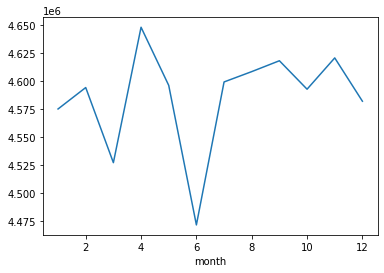

In [58]:
months = df.groupby('month')['last_price'].agg('mean')
months.plot()

<AxesSubplot:xlabel='year'>

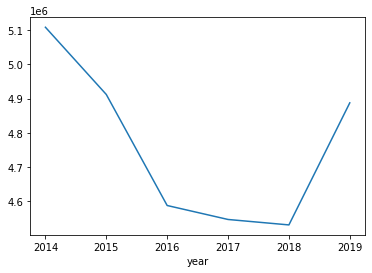

In [59]:
years = df.groupby('year')['last_price'].agg('mean')
years.plot()

<AxesSubplot:xlabel='ceiling_height'>

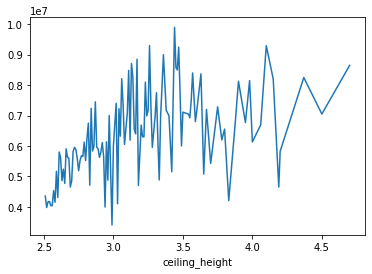

In [60]:
ch_f = df.query('ceiling_height  > 2.5 and ceiling_height < 5') 
ch_f = ch_f.groupby('ceiling_height')['last_price'].agg('mean')

ch_f.plot()

**Вывод** На представленных графиках сложно выделить зависимость цены от дня, месяца и года обьявления. 

In [61]:
mycor = df[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].corr()
mycor.head()

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.671775,0.428441,-0.344463
total_area,0.671775,1.000000,0.808178,-0.104022
rooms,0.428441,0.808178,1.000000,-0.061955
citycenters_nearest,-0.344463,-0.104022,-0.061955,1.000000


Самая сильную зависимость от цены показывает параметр общей площади. Значительно ниже зависимость от количества комнат, а зависимость по удалению от центра практически не существенна

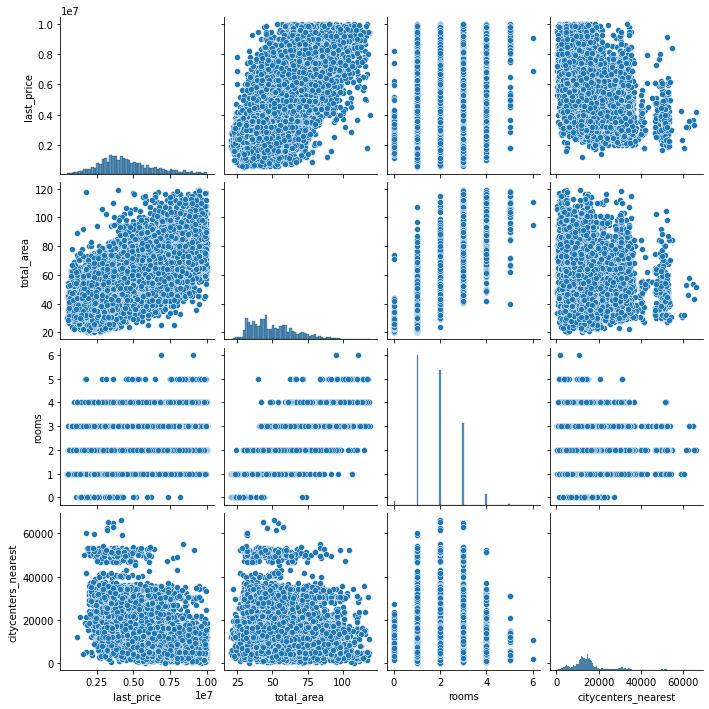

In [62]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'citycenters_nearest']])

In [77]:
df.groupby('day')['one_metr_price'].agg(['count', 'mean'])

,count,mean
day,,
Воскресенье,1312,89748.484604
Вторник,3200,90798.046969
Понедельник,2729,90502.010737
Пятница,3179,90810.432746
Среда,3024,90836.907738
Суббота,1495,89875.051973
Четверг,3310,90764.494743


Данная таблица показывает, что зависимость цены от дня недели размещения отсутствует.

In [78]:
df.groupby('month')['one_metr_price'].agg(['count', 'mean'])

,count,mean
month,,
1,1150,90623.288348
2,2044,90167.149217
3,1777,90344.258019
4,1354,91000.236189
5,1020,90486.040196
6,1491,88698.329376
7,1401,90845.855032
8,1441,92025.517418
9,1604,91869.953678


Данная таблица показывает, что зависимость цены от дня недели размещения отсутствует.

In [79]:
df.groupby('year')['one_metr_price'].agg(['count', 'mean'])

,count,mean
year,,
2014,72,90387.644444
2015,917,89520.862923
2016,2358,88625.572561
2017,7026,89084.310362
2018,6875,91352.377382
2019,1001,101821.182318


Из данной таблицы можно сделать вывод о том, что средняя цена с годами растёт незначительно. Высокие показатели средней цены кв.м. для 2019 нельзя полноценно учитывать при анализе, так как выборка мала по сравнению с предыдущими 2умя годами. При увеличении объема выборки возможно усреднение значения цены на кв.м. в сторону уменьшения

In [81]:
df.groupby('floor_cat')['one_metr_price'].agg(['count', 'mean'])

,count,mean
floor_cat,,
другой,13447,94371.420317
первый,2316,77673.164594
последний,2486,82281.201207


Данная таблица доказывает гипотезу о том, что объекты на первых этажах являеются самыми дешевыми. Объекты на последних этажах по цене чуть выше, но незначительно. А вот объекты на других этажах стоят на 15-20% дороже.

# Определение топ10 населенных пунктов

In [72]:
top_10_loc = df.pivot_table(index='locality_name', 
                                     values='one_metr_price', 
                                     aggfunc=['count', 'mean']
                                    ).round(2)
top_10_loc.columns = ['adv', 'one_metr_price']
top = top_10_loc.sort_values(by='adv', ascending=False).head(10)
top

,adv,one_metr_price
locality_name,,
Санкт-Петербург,11518,103281.16
посёлок Мурино,546,85687.70
деревня Кудрово,435,94187.18
посёлок Шушары,404,77816.34
Всеволожск,333,66559.32
Колпино,305,74637.23
посёлок Парголово,301,89672.15
Пушкин,280,99209.43
Гатчина,265,68117.90


Построим свободную таблицу и выведем информацию по количеству обьявлений и средней стоимости одного квадратного метра для всех населенных пунктов.


Улучшим релевантность выборки увеличив минимальное кол-во обьявлений на нас.пункт до 10

In [64]:
final_spot = df.query('locality_name == "Санкт-Петербург"')
final_spot.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat,citycenters_nearest_km
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,90.0,2.0,574.0,558,92785.7,8,2015,Четверг,другой,13.933
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,NaN,0.0,NaN,289,88524.6,2,2017,Воскресенье,другой,15.008
10,5,5050000,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,NaN,...,310.0,2.0,553.0,137,127525.3,11,2017,Четверг,другой,13.878
15,16,4650000,39.000000,2017-11-18,1,NaN,14.0,20.500000,5,NaN,...,590.0,1.0,296.0,19,119230.8,11,2017,Суббота,другой,14.259
16,11,6700000,82.000000,2017-11-23,3,3.05,5.0,55.599998,1,NaN,...,420.0,0.0,NaN,397,81707.3,11,2017,Четверг,первый,10.698
17,6,4180000,36.000000,2016-09-09,1,NaN,17.0,16.500000,7,NaN,...,NaN,1.0,859.0,571,116111.1,9,2016,Пятница,другой,14.616
18,8,3250000,31.000000,2017-01-27,1,2.50,5.0,19.400000,2,NaN,...,759.0,0.0,NaN,168,104838.7,1,2017,Пятница,другой,10.842
21,13,3200000,31.600000,2018-03-14,1,NaN,5.0,16.900000,2,NaN,...,248.0,0.0,NaN,310,101265.8,3,2018,Среда,другой,9.722
23,11,2950000,32.000000,2016-10-29,1,2.60,9.0,17.700001,9,NaN,...,517.0,1.0,190.0,615,92187.5,10,2016,Суббота,последний,14.211
24,8,6500000,97.199997,2015-10-31,2,NaN,3.0,46.500000,1,NaN,...,411.0,3.0,124.0,265,66872.4,10,2015,Суббота,первый,2.336


Сделаем срез исключительно по СПБ для расчёта стоимость каждого километра.

In [65]:
final_spot.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,month,year,day,floor_cat,citycenters_nearest_km
2,10,5196000,56.000000,2015-08-20,2,NaN,5.0,34.299999,4,NaN,...,90.0,2.0,574.0,558,92785.7,8,2015,Четверг,другой,13.933
9,18,5400000,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,NaN,...,NaN,0.0,NaN,289,88524.6,2,2017,Воскресенье,другой,15.008
10,5,5050000,39.599998,2017-11-16,1,2.67,12.0,20.299999,3,NaN,...,310.0,2.0,553.0,137,127525.3,11,2017,Четверг,другой,13.878
15,16,4650000,39.000000,2017-11-18,1,NaN,14.0,20.500000,5,NaN,...,590.0,1.0,296.0,19,119230.8,11,2017,Суббота,другой,14.259
16,11,6700000,82.000000,2017-11-23,3,3.05,5.0,55.599998,1,NaN,...,420.0,0.0,NaN,397,81707.3,11,2017,Четверг,первый,10.698


# Определение средней цены км по отдалению от центра

In [66]:
final_spot['int_km'] = final_spot['citycenters_nearest_km'].round()
final_spot['avg_km'] = final_spot['last_price'] / final_spot['int_km'] 

In [67]:
top_km = final_spot.pivot_table(index='int_km', 
                                     values='avg_km', 
                                     aggfunc=['count', 'mean']
                                    ).round(0) 

top_km.columns = ['count', 'avg_km']
top_km.head(15)

,count,avg_km
int_km,,
0.0,7,inf
1.0,70,7520543.0
2.0,131,3699153.0
3.0,182,2214890.0
4.0,336,1727263.0
5.0,431,1388322.0
6.0,321,1097448.0
7.0,226,882659.0
8.0,380,751881.0


<AxesSubplot:xlabel='int_km'>

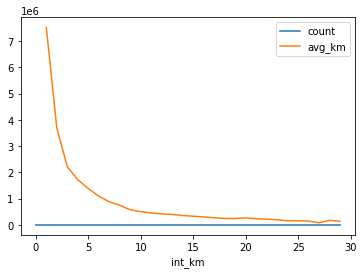

In [68]:
top_km.query('avg_km > 0 and avg_km < 30')
top_km.plot()

Вычислили среднюю стоимость для каждого километра.

**Вывод: С отдалением от центра падает средняя стоимость кв.км. Предполжительно самый мощный спад наступает при выходе за границы исторического центра**

В завершении выявим зависимость высоких потолков от цены. Она имеет место быть, но её нельзя называть ключевым фактором влияющим на стоимость, скорее второстепенным.

**Задача исследования**: выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Описание датасета**: датасет содержит информацию об обьявлениях по продаже недвижимости в СПБ и области за несколько лет.

**Пропуски в датасете**: в датасете содержится большое количество пропусков. Все картографические столбцы содержат пропуск. Вероятно это ошибка скрипта определения локации и расстояний до него. Наибольшее количество пропусков содержится в столбце по статусу объекта - апартамент. Вероятно, данная характеристика появивлась в обьявлениях уже после начала выборки. Также датасет содержит пропуски в необязательных для заполнения ячейках: жилая площадь, площадь кухни, высота потолков и т.п. В данном случае природа ошибки человеческая - люди не заполняют эти данные, когда не знают их. Данные пропуски нельзя заполнить логически, так как это может исказить данные. Данные пропуски не заполняем. А вот несколько тысяч пропусков в столбце со сроком продажи мы удалили, так как предположительно эти объекты не были проданы, а значит не могут участвовать в выборке по влияюнию факторов на цену.

**Дубликаты**: в датасете отсутствуют полные дубликаты. Устранили дубликаты в названии (поселок и посёлок). Обьединили несколько названий в одно по нас.пун. Кудрово, которое имеет одну из самых больших выборок в датасете.

**Доработка датасета**: для целей анализа в датасет были добавлены следующие данные: цена 1 кв.м., сегмент по этажу, сегменты по дню, месяцу, году.

**Типы данных**: Часть типов данных была оптимизирована в целях снижения нагрузки на память и ресурсы. Столбец с датой был преобразован в нужный формат.

**Анализ срока продажи**: в столбце со сроком продажи были выявлены аномалии связанные с правилами размещения обьявлений(сроки, платные услуги). Если не принимать во внимание данные выбросы, то можно сделать следующий вывод: **Пик продаж приходится на первый месяц размещения обьявления, о самых высоких показателях можно говорить в первые 10 дней, вероятно туда входят большинство объектов с заниженной стоимостью. После первого месяца динамика продажи(снятия обьявлений) начинает снижаться. Если обьявление висит более 6 месяцев, вероятность его реализации уменьшается с каждым месяцем.** При этом не имея данных о колебании цены за этот период этот вывод требует дополнительного изучения.

**Факторы влияющие на стоимость**: главным фактором влиющим на стоимость является общая площадь. Количество комнат также имеет влияние на цену, но это влияние меньше почти в 2 раза. Из второстепенных факторов нужно отметить высоту потолков, сегмент по этажу (цена на первый и последний этажи как правила ниже).

**ТОП нас.пунктов**: В рамках задачи были определены ТОП-5 городов по количеству обьявлений: СПБ, Кудрово, Мурино, Шушары, Всеволжск. ТОП-5 городов по средней стоимости квадртного метра: СПБ, Пушкин, Сестрорец, Кудрово, Парголово. ТОП-5 самых дешевых городов: Выборг, Всеволжск, Гатчина, Сертополово, Красное село.

**Средняя цена для каждого км. по отдалению от центра СПБ**:  В рамках задачи была определена средняя цена стоимости недвижимости при удалении от центра цена снижается и построен график. При этом лавинообразный спад, судя по графику, можно зафиксировать в диапазоне от 3-5 до 7-10 км. Примерно там же и заканчиваются границы исторического центра СПБ.

**Факторы влияющие на стоимость не попавшие в датасет**: в датасете отсутствуют ключевые факторы влияюшие на стоимость, а именно год постройки дома, тип дома, тип продажи(первичка или вторичка), наличие ремонта. Данные факторы имеют ключевое влияние на стоимость, без понимания этих факторов выводы о влиянии второстепенных факторов из датасета выглядит сомнительными из-за отсутствия возможности проверки влияния данных ключевых факторов на стоимость объекта.  

**Рекомендации заказчику**: Помимо пропущенных значений в датасете, главным недостатком данного датасета является отсутствием в не ключевых метрик виляющих на стоимость объекта. Отсутствие ключевых данных может исказить резулататы анализа, так как делая выводы о влиянии второстепенных факторов мы не учитываем влияние основных факторов попавших в датасет.
В связи с этим для получения более релевантных данных требуется обогащение датасета.
Текущие результаты анализа можно применять в качестве очень приблизительного значения по средней стоимости кв.м.
В отсутствии нужных данных рекомендуется использовать для проверки адекватности выставленной цены метрику "Общая площадь".

Минимальная цена стоимости квадратного метра(из ТОП10 количеству обьявлений) зафиксирована в Выборге